# Obtendo Dados

Para ser um cientista de dados, você precisa de dados. Na verdade, como cientista de dados, você gastará uma embaraçosa grande parte do tempo adquirindo, limpando e transformando dados. Você sempre pode digitar os dados um a um (ou se você tem *minions*, faça-os fazê-lo), mas geralmente isso não é um bom uso do seu tempo. Neste capítulo, veremos diferentes maneiras de obter dados no Python e nos formatos corretos.

## stdin e stdout

Se você executar seus scripts Python na linha de comando, poderá enviar (*pipe*) os dados para o programa usando `sys.stdin` e `sys.stdout`. Por exemplo, aqui está um script que lê linhas de texto e mostra as que correspondem a uma expressão regular:

In [3]:
# egrep.py
import sys, re

# sys.argv is the list of command-line arguments
# sys.argv[0] is the name of the program itself
# sys.argv[1] will be the regex specified at the command line
regex = sys.argv[1]

# for every line passed into the script
for line in sys.stdin:
    # if it matches the regex, write it to stdout
    if re.search(regex, line):
        sys.stdout.write(line)

Abaixo um outro script, que que conta as linhas que recebe e depois escreve a contagem:

In [4]:
# line_count.py
import sys

count = 0

for line in sys.stdin:
    count += 1

    # print goes to sys.stdout
print(count)

0


Estamos em um Jupyter notebook, então para testar os scripts acima, devemos criar um arquivo Python para cada um deles: `egrep.py` para o primeiro e `line_count.py` para o segundo, copiando e colando o código correspondente.

Você poderia então usá-los para contar quantas linhas de um arquivo contêm números. Vamos fazer isso para um arquivo contendo uma amostra de 100 tweets do presidente dos Estados Unidos, Donald Trump. Faça o download do arquivo [trump_tweets-sample.csv](./data/trump_tweets-sample.csv) e o coloque na mesma pasta dos arquivos `egrep.py` e `line_count.py`. A base de dados completa desses tweets pode ser baixada [aqui](https://medium.com/@Kyuba_NoMichi/trump-tweets-csv-data-set-a1baff572655).

Depois, no Windows, execute o comando:

`type Trump_tweets-sample.txt | python egrep.py "[0-9]" | python line_count.py`

No Unix:

`cat Trump_tweets-sample.txt | python egrep.py "[0-9]" | python line_count.py`

O `|` é o caractere `pipe`, que significa "use a saída do comando à esquerda como a entrada do comando à direita". Você pode construir pipelines de processamento de dados bem elaborados dessa maneira.

Da mesma forma, aqui está um script que conta as palavras em sua entrada e escreve as mais comuns:

In [ ]:
# most_common_words.py
import sys
from collections import Counter

# pass in number of words as first argument
try:
    num_words = int(sys.argv[1])
except:
    print("usage: most_common_words.py num_words")
    sys.exit(1) # non-zero exit code indicates error

    
counter = Counter(word.lower()                     # lowercase words
                  for line in sys.stdin            #
                  for word in line.strip().split() # split on spaces
                  if word)                         # skip empty 'words'

for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")

Como anteriormente, crie um arquivo `most_common_words.py` e execute o comando abaixo, também sobre a amostra de tweets de Donald Trump (troque `type` por `cat` se estiver em um sistema operacional Unix):

`type ..\data\Trump_tweets-sample.csv | python most_common_words.py 10`

Se você é um programador experiente do Unix, provavelmente está familiarizado com uma ampla variedade de ferramentas de linha de comando (por exemplo, `egrep`) que são incorporadas ao seu sistema operacional e que provavelmente são preferíveis para construir o seu a partir do zero. Ainda assim, é bom saber que você pode, se precisar.

## Lendo Arquivos

Você também pode ler e gravar explicitamente em arquivos diretamente no seu código. O Python torna o trabalho com arquivos bastante simples.

### Noções básicas de arquivos de texto

O primeiro passo para trabalhar com um arquivo de texto é obter um *objeto de arquivo* (ou *file object*) usando `open`:

In [1]:
# 'r' means read-only
file_for_reading = open('./data/Trump_tweets-sample.txt', 'r')

Se você quiser ler todo o conteúdo do arquivo, você pode iterar sobre as linhas do arquivo usando `for`:

In [2]:
#imprime os tweets contém alguma hashtag?
for line in file_for_reading:
    if '#' in line:
        print(line)

Today we express our deepest gratitude to all those who have served in our armed forces. #ThankAVet https://t.co/wPk7QWpK8Z,,

#ElectionNight #MAGA_ï¿½ï¿½_ï¿½ï¿½ï¿½ https://t.co/HfuJeRZbod",,

RT @IvankaTrump: Such a surreal moment to vote for my father for President of the United States! Make your voice heard and vote! #Election2ï¿½ï¿½_,,

RT @EricTrump: Join my family in this incredible movement to #MakeAmericaGreatAgain!! Now it is up to you! Please #VOTE for America! https:ï¿½ï¿½_,,

RT @DonaldJTrumpJr: FINAL PUSH! Eric and I doing dozens of radio interviews. We can win this thing! GET OUT AND VOTE! #MAGA #ElectionDay htï¿½ï¿½_,,

"Still time to #VoteTrump! 

#iVoted #ElectionNight https://t.co/UZtYAY1Ba6",,

#ElectionDay https://t.co/MXrAxYnTjY https://t.co/FZhOncih21,,

#NH #NewHampshire #MAGA https://t.co/JDgcyJvJpk",,

LIVE on #Periscope: Join me for a few minutes in Pennsylvania. Get out &amp; VOTE tomorrow. LETS #MAGA!! https://t.co/Ej0LmMK3YU,,

Just landed in North Carolina

Por fim, você precisa fechar o arquivo com a operação `close` para que outros processos possam manipulá-lo depois que você terminar:

In [8]:
file_for_reading.close()

Você pode também criar um arquivo para escrita a partir do parâmetro `w`, mas cuidado, se o arquivo existir, **todo o seu conteúdo será perdido**. Use a rotina `write` para escrever texto no arquivo:

In [9]:
# 'w' is write -- will destroy the file if it already exists!
file_for_writing = open('./data/My_tweets_are_better.txt', 'w')
file_for_writing.write('Alguém por aqui?\n')
file_for_writing.close()

Por fim, você pode abrir um arquivo existente e adicionar dados a ele a partir do parâmetro `a`:

In [10]:
# 'a' is append -- for adding to the end of the file
file_for_appending = open('./data/My_tweets_are_better.txt', 'a')
file_for_appending.write('Aparentemente não... :(\n')

# don't forget to close your files when you're done
file_for_appending.close()

Como é comum as pessoas esquecerem de fechar arquivos, você pode usá-los com um bloco `with`. No final da execução desse bloco, os arquivos são fechados automaticamente.

In [11]:
with open('./data/My_tweets_are_better.txt','r') as f:
    for line in f:
        print(line)


Alguém por aqui?

Aparentemente não... :(



Na iteração sobre as linhas do arquivo, você pode executar qualquer operação de *string* sobre elas, como usar expressões regulares:

In [12]:
import re

starts_with_hash = 0

with open('./data/Trump_tweets-sample.txt','r') as f:
    for line in f:
        if re.match("^#",line):
            print(line)
            starts_with_hash += 1

print('numero de tweets do D. Trump que comecam com #: ', starts_with_hash)

#ElectionNight #MAGA_ï¿½ï¿½_ï¿½ï¿½ï¿½ https://t.co/HfuJeRZbod",,

#iVoted #ElectionNight https://t.co/UZtYAY1Ba6",,

#ElectionDay https://t.co/MXrAxYnTjY https://t.co/FZhOncih21,,

#NH #NewHampshire #MAGA https://t.co/JDgcyJvJpk",,

#ICYMI- watch: https://t.co/fVThC7yIL6 https://t.co/e8SaXiJrxj",,

#ICYMI watch rally here:ï¿½ï¿½_ https://t.co/LbvNHo6T2k",,

#MakeAmericaGreatAgain_ï¿½ï¿½_ï¿½ï¿½ï¿½  

#ICYMI, watch hereï¿½ï¿½_ https://t.co/maWukVBTr8",,

#MakeAmericaGreatAgain 

numero de tweets do D. Trump que comecam com #:  9


Cada linha que você recebe dessa maneira termina em um caractere de nova linha, então você frequentemente vai querer executar um `strip()` antes de fazer qualquer coisa com ela.

Por exemplo, imagine que você tenha um arquivo cheio de hashtags do Twitter, como o arquivo contendo os tweets do D. Trump, e queira contar a ocorrência de cada hashtag. Dependendo do arquivo de entrada, as regras para extrair as hashtags podem ser complicadas, mas se já sabemos que o arquivo de entrada contém somente tweets, podemos pegar as palavras (ou textos circundados por espaços e quebras de linhas) a partir do método `split()`. Depois, contamos as palavras que começam com `'#'`.

In [5]:
from collections import Counter

def get_hashtags(tweet):
    words = tweet.split()
    return [word.strip(",") for word in words if '#' in word]
    

hashtag_counts = Counter()

with open('./data/Trump_tweets-sample.txt', 'r') as f:
    for line in f:
        if "#" in line:
            hashtag_counts.update(get_hashtags(line.strip()))
    
for hashtag, count in hashtag_counts.most_common(5):
    print (hashtag, count)

#ElectionNight 2
#MAGA 2
#ElectionDay 2
#VoteTrumpPence16! 2
#MAGA! 2


## Arquivos Delimitados

O arquivo contendo tweets de Donald Trump que acabamos de processar tinha um tweet por linha. Com mais frequência, você trabalha com arquivos com muitos dados em cada linha. Esses arquivos *geralmente* são separados por vírgulas ou por tabulações. Cada linha pode ser chamada de registro, e possui vários campos, com uma vírgula (ou uma tabulação) indicando onde um campo termina e o próximo campo é iniciado. O caractere que separa os campos do registro é chamado de *separador*.

Isso começa a ficar complicado quando você tem campos com vírgulas, tabulações e quebras de linha neles. Por esse motivo, é quase sempre um erro tentar analisá-las você mesmo. Em vez disso, você deve usar o módulo `csv` do Python (ou a biblioteca `pandas`). Por razões técnicas que você deve se sentir livre para culpar a Microsoft, você deve sempre trabalhar com arquivos `csv` no modo *binário*, incluindo um *b* após a *r* ou *w* (consulte [Stack Overflow](https://stackoverflow.com/questions/4249185/how-to-append-to-a-csv-file)) quando for manipular arquivos.

Se o seu arquivo não tiver cabeçalhos (o que significa que você provavelmente tratará cada linha como uma lista, e que será um problema saber o que cada coluna significa), você poderá usar o `csv.reader` para iterar sobre as linhas, cada uma das quais será uma lista dividida apropriadamente.

Por exemplo, considere o arquivo `./data/prices.csv` contendo preços de ações do dia `30/12/2016`. Este arquivo, e outros arquivos contendo preços de ações, pode ser baixado [aqui](https://github.com/eliangcs/pystock-data). Primeiro, vamos imprimir algumas linhas do arquivo:

In [14]:
with open('./data/prices.csv', 'r') as f:
    for i in range(5):
        line = f.readline()
        print(line)


symbol,date,open,high,low,close,volume,adj_close

FAX,2016-12-30,4.65,4.70,4.61,4.63,3498900,4.63

IAF,2016-12-30,5.44,5.48,5.40,5.42,103500,5.42

FCO,2016-12-30,7.91,8.01,7.91,7.96,64800,7.96

ISL,2016-12-30,16.08,16.08,16.059999,16.07,2400,16.07



É um arquivo `csv` com cabeçalho e diversos campos, todos separados por uma `,`. Por causa disso, podemos usar a biblioteca `csv` para tratar cada linha como um dicionário:

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./data/prices.csv')
df

,symbol,date,open,high,low,close,volume,adj_close
0,FAX,2016-12-30,4.650000,4.700000,4.610000,4.630000,3498900,4.630000
1,IAF,2016-12-30,5.440000,5.480000,5.400000,5.420000,103500,5.420000
2,FCO,2016-12-30,7.910000,8.010000,7.910000,7.960000,64800,7.960000
3,ISL,2016-12-30,16.080000,16.080000,16.059999,16.070000,2400,16.070000
4,IF,2016-12-30,6.380000,6.380000,6.310000,6.360000,19100,6.360000
5,CH,2016-12-30,6.070000,6.070000,5.960000,5.960000,28500,5.960000
6,ACU,2016-12-30,26.540001,26.660000,25.350000,25.570000,9300,25.570000
7,XXII,2016-12-30,1.120000,1.130000,1.050000,1.090000,895400,1.090000
8,AIII,2016-12-30,1.100000,1.130000,1.090000,1.110000,25200,1.110000
9,ATNM,2016-12-30,0.940000,0.950000,0.870000,0.875000,832400,0.875000


In [15]:
import csv

richCompanies = dict()

with open('./data/prices.csv', 'r') as f:
    reader = csv.DictReader(f, delimiter=',')
    for row in reader:
        symbol = row["symbol"]
        date = row["date"]
        closing_price = float(row["close"]) #preco de fechamento
        if closing_price > 400:
            richCompanies[symbol] = closing_price
            print(date, symbol, closing_price)

2016-12-30 SEB 3951.98999
2016-12-30 ALX 426.869995
2016-12-30 Y 608.119995
2016-12-30 AZO 789.789978
2016-12-30 BH 473.200012
2016-12-30 CABO 621.72998
2017-01-02 ELC 26500.0
2016-12-30 ELC 26500.0
2016-12-30 GHC 511.950012
2016-12-30 GOOG 771.820007
2016-12-30 GOOGL 792.450012
2016-12-30 AMZN 749.869995
2016-12-30 ATRI 507.200012
2016-12-30 MKL 904.5
2016-12-30 MTD 418.559998
2016-12-30 NEU 423.839996
2016-12-30 NVR 1669.0
2017-01-02 SAB 197700.0
2016-12-30 SAB 197700.0
2016-12-30 HBANP 1414.969971
2016-12-30 ISRG 634.169983
2016-12-30 WTM 836.049988
2016-12-30 PCLN 1466.060059


Mesmo que seu arquivo não tenha cabeçalhos, você ainda pode usar o `DictReader` passando as chaves como um parâmetro `fieldnames`.

Você também pode escrever dados delimitados usando `csv.writer`:

In [16]:
#today_prices = { 'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5 }
with open('./data/rich_companies.txt','w', encoding='utf8',newline='') as f:
    writer = csv.writer(f, delimiter=',')
    for stock, price in richCompanies.items():
        writer.writerow([stock, price])

## Raspar (*Scrap*) a Web

Outra maneira de obter dados é raspando-os de páginas da web. Buscar páginas da web é bem fácil; obter informação estruturada significativa delas, menos.

### HTML e a sua análise

Páginas na Web são escritas em HTML, em que o texto é (idealmente) marcado em elementos e seus atributos (copie e cole o código abaixo para esta célula):

In [ ]:
<html>
    <head>
        <title>A web page</title>
    </head>
    <body>
        <p id="author">Pedro Olmo</p>
        <p id="subject">Ciência dos Dados</p>
    </body>
</html>

Em um mundo perfeito, onde todas as páginas da Web são marcadas semanticamente em nosso benefício, poderíamos extrair dados usando regras como "encontre o elemento `<p>` cujo `id` é `subject` e retorne o texto que ele contém". No mundo atual, HTML não é geralmente bem formado, muito menos bem anotado. Isso significa que precisaremos de ajuda para usar e coletar dados de páginas Web.

Para obter dados de HTML, usaremos a biblioteca [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/), que constrói uma árvore a partir dos vários elementos em uma página da Web e fornece uma interface simples para acessá-los. Enquanto escrevo isso, a última versão é Beautiful Soup 4.6.0 (`pip install beautifulsoup4`, ou, se estiver usando `Anaconda`, não precisa fazer nada), que é a que vamos usar. Também usaremos a biblioteca [`requests`](http://docs.python-requests.org/en/latest/), que é uma maneira muito mais agradável de fazer solicitações HTTP do que qualquer outra que esteja incorporada ao Python.

O *parser* (ou em português, analisador - horrível, né?) de HTML interno do Python não é tão tolerante, o que significa que nem sempre combina bem com HTMLs que não estão perfeitamente formadas. Por esse motivo, usaremos um *parser* diferente, que precisamos instalar (caso você não esteja usando o *Anaconda*):

`pip install html5lib`.

Para usar o *Beautiful Soup*, precisamos passar um pouco de HTML para a função `BeautifulSoup()`. Em nossos exemplos, isso será o resultado de uma chamada para `requests.get`:

In [5]:
from bs4 import BeautifulSoup
import requests
html = requests.get("http://www.example.com").text
soup = BeautifulSoup(html, 'html5lib')

In [6]:
print(html)

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 50px;
        background-color: #fff;
        border-radius: 1em;
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        body {
            background-color: #fff;
        }
        div {
            width: auto;
            margin: 0 auto;
            border-radius: 0;
            padding: 1em;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This doma

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 50px;
        background-color: #fff;
        border-radius: 1em;
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        body {
            background-color: #fff;
        }
        div {
            width: auto;
            margin: 0 auto;
            border-radius: 0;
            padding: 1em;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domain is established to be used for illustrative examples in documents. You may use this
    domain in examples without prior coordination or asking for permission.</p>
    <p><a href="http://www.iana.org/domains/example">More information...</a></p>
</div>
</body>
</html>

A página acima é muito simples. Vamos brincar com uma página mais interessante:

In [7]:
html = requests.get("http://www.imdb.com").text
soup = BeautifulSoup(html, 'html5lib')

In [4]:
print(html)



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    
    
    

    
    
    

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>IMDb - Movies, TV and Celebrities - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == '

Depois disso, podemos ir muito longe usando alguns métodos simples.

Normalmente, trabalhamos com objetos `Tag`, que correspondem às *tags* que representam a estrutura de uma página HTML.

Por exemplo, para encontrar a primeira *tag* `<p>` (e seu conteúdo), você pode usar:

In [5]:
first_paragraph = soup.find('p')
print(first_paragraph)

<p class="navCategory">
                <a href="/movies-in-theaters/?ref_=nv_tp_inth_1">Movies</a>,
                <a href="/chart/toptv/?ref_=nv_tp_tv250_2">TV</a><br/>
                &amp; <a href="/showtimes/?ref_=nv_tp_sh_3">Showtimes</a></p>


<p class="navCategory">
                <a href="/movies-in-theaters/?ref_=nv_tp_inth_1">Movies</a>,
                <a href="/chart/toptv/?ref_=nv_tp_tv250_2">TV</a><br/>
                &amp; <a href="/showtimes/?ref_=nv_tp_sh_3">Showtimes</a></p>

Você pode obter o conteúdo textual de uma `Tag` usando a propriedade `text`:

In [6]:
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()
print(first_paragraph_words)

['Movies,', 'TV', '&', 'Showtimes']


E você pode extrair os atributos de uma *tag* tratando-a como um `dict`:

In [36]:
first_paragraph_class = soup.p['class'] # keyError se não tiver o atributo!
print(first_paragraph_class)

['navCategory']


Você pode obter múltiplas *tags* de uma vez só:

In [46]:
all_paragraphs = soup.find_all('p') # or just soup('p')

paragraphs_with_class = [p for p in soup('p') if p.has_attr('class')]
paragraphs_with_class_seemore = [p for p in paragraphs_with_class if 'seemore' in p['class']] #keyError!

for p in paragraphs_with_class_seemore:
    print("->> ", p, "\n")


->>  <p class="seemore"><a class="position_bottom supplemental" href="/trailers?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=f65194f9-e7ae-45f9-8d26-ded181581dd7&amp;pf_rd_r=5TMG77M29YJCX3RTCNWA&amp;pf_rd_s=hero&amp;pf_rd_t=15061&amp;pf_rd_i=homepage&amp;ref_=hm_hp_sm"> Browse trailers</a></p> 

->>  <p class="seemore"><a class="position_bottom supplemental" href="/list/ls025720609/videoplayer/vi71875353?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=9d3f8854-4417-45fa-985d-005bd2b6704c&amp;pf_rd_r=5TMG77M29YJCX3RTCNWA&amp;pf_rd_s=center-2&amp;pf_rd_t=15061&amp;pf_rd_i=homepage&amp;ref_=hm_vd_jb_im_sm"> You don't know Jack</a></p> 

->>  <p class="seemore"><a class="position_bottom supplemental" href="/emmys/emmys-2018-date-night/rg2428017408?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=a5546aa7-76fe-4d59-8582-799cb9424373&amp;pf_rd_r=5TMG77M29YJCX3RTCNWA&amp;pf_rd_s=center-3&amp;pf_rd_t=15061&amp;pf_rd_i=homepage&amp;ref_=hm_emy_2018_dates_sm"> See all your favorite couples in our gallery</a></p> 

->>  <p class="se

Com frequência você vai querer encontrar *tags* com uma classe (*class*) específica:

In [44]:
news_links = soup('li', {'class' : 'news_item'})

for p in news_links:
    print("NEWS: ", p, "\n")

headlines = soup('a', 'headlines')

for p in headlines:
    print("HEADLINE: ", p, "\n")
    
infobar = [p for p in soup('div')
           if p.has_attr('class') and 'infobar' in p['class']]
                         #if 'infobar' in p.get('class', [])]

for p in infobar:
    print("INFO BAR: ", p, "\n")

NEWS:  <li class="news_item">
<a href="/news/ni62215049?ref_=nv_nw_tn_1"> ‘Bond 25’ Gets Cary Joji Fukunaga As New Director For 007 Daniel Craig
</a><br/>
                <small>
                <span>5 hours ago</span>
                <span>|</span>
                <span>Deadline</span>
                </small>
            </li> 

NEWS:  <li class="news_item">
<a href="/news/ni62215053?ref_=nv_nw_tn_2"> Cary Joji Fukunaga to Direct New James Bond Film
</a><br/>
                <small>
                <span>5 hours ago</span>
                <span>|</span>
                <span>Variety</span>
                </small>
            </li> 

NEWS:  <li class="news_item">
<a href="/news/ni62214801?ref_=nv_nw_tn_3"> Bruce Greenwood Boards ‘The Shining’ Sequel ‘Doctor Sleep’
</a><br/>
                <small>
                <span>15 hours ago</span>
                <span>|</span>
                <span>Deadline</span>
                </small>
            </li> 

HEADLINE:  <a class="headlines" 

E você pode combiná-los para implementar uma lógica mais elaborada. Por exemplo, se você quiser encontrar todos os elementos `<span>` contidos em um elemento `<div>`, faça o seguinte:

In [27]:
spans_inside_divs = [span
                     for div in soup('div') # for each <div> on the page
                     for span in div('span')] # find each <span> inside it

for s in spans_inside_divs:
    print("SPAN INSIDE DIV: ", s, "\n")

SPAN INSIDE DIV:  <span id="home_img_holder">
<a class="navbarSprite" href="/?ref_=nv_home" id="home_img" title="Home"></a>  <span class="alt_logo">
    <a href="/?ref_=nv_home" title="Home">IMDb</a>
  </span>
</span> 

SPAN INSIDE DIV:  <span class="alt_logo">
    <a href="/?ref_=nv_home" title="Home">IMDb</a>
  </span> 

SPAN INSIDE DIV:  <span class="downArrow"></span> 

SPAN INSIDE DIV:  <span class="downArrow"></span> 

SPAN INSIDE DIV:  <span class="downArrow"></span> 

SPAN INSIDE DIV:  <span>2 hours ago</span> 

SPAN INSIDE DIV:  <span>|</span> 

SPAN INSIDE DIV:  <span>MovieWeb</span> 

SPAN INSIDE DIV:  <span>6 hours ago</span> 

SPAN INSIDE DIV:  <span>|</span> 

SPAN INSIDE DIV:  <span>Box Office Mojo</span> 

SPAN INSIDE DIV:  <span>17 hours ago</span> 

SPAN INSIDE DIV:  <span>|</span> 

SPAN INSIDE DIV:  <span>Deadline Movie News</span> 

SPAN INSIDE DIV:  <span class="downArrow"></span> 

SPAN INSIDE DIV:  <span class="downArrow"></span> 

SPAN INSIDE DIV:  <span class=

SPAN INSIDE DIV:  <span class="ab_widget">
        
    

    <div class="ab_ninja">
<span class="widget_header"> <span class="oneline"> <a href="/list/ls025720609/videoplayer/vi3365583641?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=64962e87-e3fa-41c9-bc7f-a662485f2b90&amp;pf_rd_r=E5RGX2B9PJXBAB2J4Z0B&amp;pf_rd_s=center-4&amp;pf_rd_t=15061&amp;pf_rd_i=homepage&amp;ref_=hm_pks_jwfk_blw1_hd"> <h3> 'Jurassic World: Fallen Kingdom' in Focus</h3> </a> </span> </span> <p class="blurb">Excited for <i><a href="/title/tt4881806/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=64962e87-e3fa-41c9-bc7f-a662485f2b90&amp;pf_rd_r=E5RGX2B9PJXBAB2J4Z0B&amp;pf_rd_s=center-4&amp;pf_rd_t=15061&amp;pf_rd_i=homepage&amp;ref_=hm_pks_jwfk_blw1_lk1">Jurassic World: Fallen Kingdom</a></i>? Hear the stars answer questions with a twist, view <a href="/name/nm0695435?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=64962e87-e3fa-41c9-bc7f-a662485f2b90&amp;pf_rd_r=E5RGX2B9PJXBAB2J4Z0B&amp;pf_rd_s=center-4&amp;pf_rd_t=15061&amp;pf_rd_i=homepage&amp;re

SPAN INSIDE DIV:  <span><a href="/offsite/?page-action=offsite-movieweb&amp;token=BCYu13Wh89D-cqkmxTm1ynPhGgVgXKrq5nLiHjoolBBvD5HPfjYtOhww2IoVlIBfI1JB34eQFZCZ%0D%0AwAbRBRJO0WAwoh-uJZ6DYIcuEXr_4I51J-V09xLSq6BVOAAZe2RwcbaTJL5KHPw5DONP98rU1QCv%0D%0AUP6v_IPlNHsEmQ0kOkKinFihmXKgBKcL4uFETuY2FcWI%0D%0A&amp;pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=73ff69c3-cf0f-4468-ab90-5a2ea2639a0b&amp;pf_rd_r=E5RGX2B9PJXBAB2J4Z0B&amp;pf_rd_s=center-6&amp;pf_rd_t=15061&amp;pf_rd_i=homepage&amp;ref_=hm_nw_mv5_src">MovieWeb</a></span> 

SPAN INSIDE DIV:  <span class="see-all"><a href="/news/movie?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=73ff69c3-cf0f-4468-ab90-5a2ea2639a0b&amp;pf_rd_r=E5RGX2B9PJXBAB2J4Z0B&amp;pf_rd_s=center-6&amp;pf_rd_t=15061&amp;pf_rd_i=homepage&amp;ref_=hm_nw_sm">See more Movie News</a></span> 

SPAN INSIDE DIV:  <span class="text-muted">1 day ago</span> 

SPAN INSIDE DIV:  <span class="ghost">|</span> 

SPAN INSIDE DIV:  <span><a href="/offsite/?page-action=offsite-theplaylist&amp;token=BCYkVrd1AQo9r4

SPAN INSIDE DIV:  <span class="ghost">|</span> 

SPAN INSIDE DIV:  <span><a href="/offsite/?page-action=offsite-theplaylist&amp;token=BCYkVrd1AQo9r4ebjIhCh_hlFZhGFiHZxlLVG4rhSek2hkmEBImkZxIDRoTVzdnZuznT41cb2iBK%0D%0AsGeIV8dDsqu6Ftqv4wiJBqpx-pw99nLS7eF5Y4baCfMx8f1qyF5_fuC6tMqnohoVnQ-zR9DS3z2O%0D%0A7gXa6b5cwHLAQPY9tIzhgiFIBM3wQOdYCOjVcrSCpFiD%0D%0A&amp;pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=73ff69c3-cf0f-4468-ab90-5a2ea2639a0b&amp;pf_rd_r=E5RGX2B9PJXBAB2J4Z0B&amp;pf_rd_s=center-6&amp;pf_rd_t=15061&amp;pf_rd_i=homepage&amp;ref_=hm_nw_tv1_src">The Playlist</a></span> 

SPAN INSIDE DIV:  <span class="nobr"><a href="/news/ni62106544?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=73ff69c3-cf0f-4468-ab90-5a2ea2639a0b&amp;pf_rd_r=E5RGX2B9PJXBAB2J4Z0B&amp;pf_rd_s=center-6&amp;pf_rd_t=15061&amp;pf_rd_i=homepage&amp;ref_=hm_nw_tv1_sm">See more</a> »</span> 

SPAN INSIDE DIV:  <span class="text-muted">5 hours ago</span> 

SPAN INSIDE DIV:  <span class="ghost">|</span> 

SPAN INSIDE DIV:  <span><a href="/offsite/?p

SPAN INSIDE DIV:  <span class="ghost">|</span> 

SPAN INSIDE DIV:  <span><a href="/offsite/?page-action=offsite-tvline&amp;token=BCYk0bz2Qi1c1dMKSPwdX62UObdthV8BnyvDpK2q7b5vM518ufLcC3q4Un1mdzkWvR1jbwCogffP%0D%0AxwvnIuf7FeI-2hL68MF9zn1CfFykoVIzdE5Bhz8oVKoaX6lsEVZaSN4xVazpMQepcbnvcMiN758G%0D%0A3-0RLXtKy8zg6sVtlQyzHskDqoM-gLYVPFjNWh_RHs0t%0D%0A&amp;pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=73ff69c3-cf0f-4468-ab90-5a2ea2639a0b&amp;pf_rd_r=E5RGX2B9PJXBAB2J4Z0B&amp;pf_rd_s=center-6&amp;pf_rd_t=15061&amp;pf_rd_i=homepage&amp;ref_=hm_nw_cel2_src">TVLine.com</a></span> 

SPAN INSIDE DIV:  <span class="text-muted">20 hours ago</span> 

SPAN INSIDE DIV:  <span class="ghost">|</span> 

SPAN INSIDE DIV:  <span><a href="/offsite/?page-action=offsite-eonline&amp;token=BCYjo28QOrtPXwxm4j3G24j2egtxQUobqp6hpedqwUlwSZ4_Vv7SMDR7ZCNnr8SVGPMASQ0katJa%0D%0A-U-8aG-x9H5u9Y9vDqJtSup7e8jC6XdbSyC2t4fxkf-ttEsTp_XQo050FhW6JOItVoieL8tjIHYT%0D%0A9pyfucslVS8N-_ZDBC-e65pw-uTCOGFsIVaGSfSGP7d2%0D%0A&amp;pf_rd_m=A2FGELUUNOQJNL&a

Apenas esse punhado de recursos nos permitirá fazer bastante. Se você precisar fazer coisas mais complicadas (ou se estiver curioso), verifique a documentação.

É importante mencionar que antes de implementar o seu *scrapper*, você precisará inspecionar cuidadosamente o HTML de origem, analisar sua lógica de seleção e se preocupar com os casos de borda para garantir que seus dados estejam corretos. Vamos ver um exemplo.

## Coletar dados de websites é proibido?

Eu não sou advogado, nem sei as nuances e o tamanho do problema, mas [este tópico](https://www.quora.com/On-which-websites-can-I-do-web-scraping-legally) no Quora dá uma boa ideia sobre isso.

## Exemplo: Livros da O’Reilly sobre Dados

Um potencial investidor na DataSciencester acha que os dados são apenas uma moda passageira. Para provar que ele está errado, você decide examinar quantos livros de dados O’Reilly publicou ao longo do tempo. Depois de vasculhar o site, você descobre que ele possui muitas páginas de livros de dados, acessíveis por meio de páginas contendo diversos itens:

[https://ssearch.oreilly.com/?i=1;q=data;q1=Books;x1=t1&act=fc_contenttype_Books](https://ssearch.oreilly.com/?i=1;q=data;q1=Books;x1=t1&act=fc_contenttype_Books)

A menos que você queira ser um idiota (e a menos que você queira que seu raspador seja banido), sempre que você quiser extrair dados de um site, primeiro verifique se ele algum tipo de política de acesso. Neste caso, olhe para:

[http://oreilly.com/terms/](http://oreilly.com/terms/)

Parece não haver nada que proíba esse projeto. Para sermos bons cidadãos, devemos também procurar um arquivo `robots.txt` que diga aos webcrawlers como se comportar. As linhas importantes no antigo `robots.txt`, que ficava em http://shop.oreilly.com/robots.txt eram:

`Crawl delay: 30
Request-rate: 1/30`

O primeiro nos diz que devemos esperar 30 segundos entre as solicitações, o segundo que devemos solicitar apenas uma página a cada 30 segundos. Então, basicamente, são duas maneiras diferentes de dizer a mesma coisa. (Há outras linhas que indicam que os diretórios não devem ser copiados, mas não incluem nosso URL, por isso, estamos bem lá.)

A [nova versão](https://www.oreilly.com/robots.txt) do `robots.txt` da O'reilly não diz nada sobre o quanto devemos esperar, apenas sobre os diretórios bloqueados:

```
User-agent: *

Disallow: /images/
Disallow: /graphics/
Disallow: /admin/
Disallow: /promos/
Disallow: /ddp/
Disallow: /dpp/
Disallow: /programming/free/files/
Disallow: /design/free/files/
Disallow: /iot/free/files/
Disallow: /data/free/files/
Disallow: /webops-perf/free/files/
Disallow: /web-platform/free/files/
Disallow: /cs/
Disallow: /test/

User-agent: 008
Disallow: /
```

Para descobrir como extrair os dados, vamos fazer o download de uma dessas páginas e alimentá-la no Beautiful Soup. Mais especificamente, buscar a primeira página da busca por livros relacionados a *"Data"* no site da O'Reilly:

In [47]:
# you don't have to split the url like this unless it needs to fit in a book
url = "https://ssearch.oreilly.com/?i=1;q=data;q1=Books;x1=t1&act=fc_contenttype_Books"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

Se você visualizar a fonte da página (em seu navegador, clique com o botão direito do mouse e selecione "Ver código-fonte" ou "Ver código-fonte da página" ou qualquer outra opção mais parecida), você verá que cada livro  parece estar contido exclusivamente em um elemento do tipo `article` cuja classe é `result product-result`. Abaixo uma versão do HTML relevante para um livro:

In [ ]:
<article class="result product-result">
           <a class="learn-more" href="http://shop.oreilly.com/product/0636920033400.do">Learn more</a>
            	 
              <a href="http://shop.oreilly.com/product/0636920033400.do"> 
                <img src="//akamaicovers.oreilly.com/images/0636920033400/cat.gif" alt="Data Science from Scratch" class="book" />
              </a>
              <div class="book_text">
              	
          <p class="title">
                <a href="http://shop.oreilly.com/product/0636920033400.do">
                  Data Science from Scratch
                </a>
            </p>
             <p class="note">By Joel Grus</p>
              <p class="note publisher">Publisher: O'Reilly Media</p>
               <p class="note date2">Release Date: 
                        April 2015 
            </p>        
              <p class="note">Language: English</p>
              <div class="ratings">
            
<script type="text/javascript">
/* <![CDATA[ */
POWERREVIEWS.display.snippet(document, {
pr_page_id:'0636920033400.IP',
pr_snippet_min_reviews : '1'
});
/* ]]> */
</script>
              </div> <!-- /ratings -->
              </div><!-- /.book_text -->
</article>

Um bom primeiro passo é econtrar todos os `article` com a classe `result product-result`:

In [49]:
articles = soup('article', 'result product-result')
print(len(articles))

16


Agora somos capazes de começar a extrair dados dos elementos `article`. Parece que o título do livro está dentro de uma *tag* `<a>` que fica dentro de uma *tag* `<p>` de classe `class = "title"`. Depois de recurar o título, precisamos usar `strip` para remover os espaços antes e depois do título.

In [50]:
first_book = soup.find('article', 'result product-result')
titleinfo = first_book.find('p', 'title')
title = titleinfo.a.text.strip()
print(title)

Interactive Data Visualization for the Web


O(s) autor(es) estão no texto da tag `<p>` de classe `class="note"`. Eles são precedidos por um "By" (do qual queremos nos livrar) e separados por vírgulas (que queremos dividir, depois dos quais precisaremos nos livrar dos espaços):

In [52]:
import re
author_name = first_book.find('p', 'note').text
authors = [x.strip() for x in re.sub("^By ", "", author_name).split(",")]
print(authors)

['Scott Murray']


A editora está em uma *tag* `<p>` de classe `class="note publisher"`, sendo precedida por um "Publisher:", que queremos remover:

In [53]:
publisher_name = first_book.find('p', 'note publisher').text
publisher = re.sub("^Publisher: ", "", publisher_name).strip()
print(publisher)

O'Reilly Media


Por fim, o ano de lançamento do livro se encontra na *tag* `<p>` de classe `class="note date2"`, precedida por "Release Date:", que também queremos remover:

In [54]:
date_tag = first_book.find('p', 'note date2').text
release_date = re.sub("^Release Date: ", "", date_tag).strip()
print(release_date)

March 2013


Vamos agora colocar todas essas informações em uma função:

In [55]:
def book_info(article):
    """given a BeautifulSoup <article> Tag representing a book,
    extract the book's details and return a dict"""
    
    titleinfo = article.find('p', 'title')
    title = titleinfo.a.text.strip()    

    author_name = article.find('p', 'note').text
    authors = [x.strip() for x in re.sub("^By ", "", author_name).split(",")]

    publisher_name = article.find('p', 'note publisher').text
    publisher = re.sub("^Publisher: ", "", publisher_name).strip()

    date_tag = article.find('p', 'note date2').text
    release_date = re.sub("^Release Date: ", "", date_tag).strip()
    return {
        "title" : title,
        "authors" : authors,
        "publisher" : publisher,
        "release_date" : release_date
    }

E agora estamos prontos para coletar os dados de todos os livros:

In [97]:
from bs4 import BeautifulSoup
import requests

from time import sleep

base_url1 = "https://ssearch.oreilly.com/?i=1;page="
base_url2 = ";q=data;q1=Books;x1=t1&act=pg_"
books = []
NUM_PAGES = 105 #quantas páginas você quer coletar?
for page_num in range(1, NUM_PAGES + 1):
    print("souping page", page_num, ",", len(books), " found so far")
    url = base_url1 + str(page_num) + base_url2 + str(page_num)
    soup = BeautifulSoup(requests.get(url).text, 'html5lib')
    for article in soup('article', 'result product-result'):
        books.append(book_info(article))
        # seja um bom cidadão e dê um tempo entre requisições
    sleep(10)

souping page 1 , 0  found so far
souping page 2 , 16  found so far
souping page 3 , 32  found so far
souping page 4 , 48  found so far
souping page 5 , 64  found so far
souping page 6 , 80  found so far
souping page 7 , 96  found so far
souping page 8 , 112  found so far
souping page 9 , 128  found so far
souping page 10 , 144  found so far
souping page 11 , 160  found so far
souping page 12 , 176  found so far
souping page 13 , 192  found so far
souping page 14 , 208  found so far
souping page 15 , 224  found so far
souping page 16 , 240  found so far
souping page 17 , 256  found so far
souping page 18 , 272  found so far
souping page 19 , 288  found so far
souping page 20 , 304  found so far
souping page 21 , 320  found so far
souping page 22 , 336  found so far
souping page 23 , 352  found so far
souping page 24 , 368  found so far
souping page 25 , 384  found so far
souping page 26 , 400  found so far
souping page 27 , 416  found so far
souping page 28 , 432  found so far
souping p

Extrair dados de HTML como este é mais arte de dados do que ciência de dados. Existem incontáveis outras lógicas de encontrar livros e encontrar títulos que teriam funcionado tão bem quanto essa.

### JSON

Depois de coletar os dados, uma boa prática é salvar os dados coletados em um arquivo, assim não precisamos coletá-los novamente sempre que eles forem necessários. Uma forma rápida de salvar e carregar tais dados é através do formato  e da biblioteca `json`. JSON (ou *JavaScript Object Notation*), é um formato compacto, de padrão aberto independente, de troca de dados simples e rápida entre sistemas, especificado por Douglas Crockford em 2000, que utiliza texto legível a humanos, no formato atributo-valor (natureza auto-descritiva). Os objetos JavaScript parecem bastante semelhantes aos ditames do Python, o que torna suas representações de string fáceis de interpretar:

```
{ "title" : "Data Science Book",
"author" : "Joel Grus",
"publicationYear" : 2014,
"topics" : [ "data", "science", "data science"] }
```
Podemos salvar e carregar arquivos JSON usando o módulo `json` do Python. Em particular, usaremos a função `dump` para escrever e `load` para carregar arquivos, que desserializa uma *string* representando um objeto JSON em um objeto Python:

In [100]:
import json
with open('./data/booksOReilly.json', 'w') as fout:
    json.dump(books, fout)

In [2]:
import json

with open('./data/booksOReilly.json') as json_file:  
    books = json.load(json_file)

Podemos usar também as funções `dumps` e `loads`, dependendo do formato do arquivo que queremos salvar ou carregar. Enquanto as funções `dump` e `load` fazem a tradução para e de objetos `file`, `dumps` e `loads` fazem a conversão para e de objetos `string`. Para mais informações, consulte o [*StackOverflow*](https://stackoverflow.com/questions/32911336/what-is-the-difference-between-json-dumps-and-json-load)

Agora que coletamos os dados, podemos plotar o número de livros publicados em cada ano:

In [3]:
matplotlib inline

Counter({2015: 222, 2013: 201, 2016: 174, 2014: 164, 2010: 161, 2017: 156, 2011: 136, 2012: 100, 2009: 50, 2006: 39, 2005: 35, 2007: 31, 2003: 31, 2002: 30, 2008: 25, 2018: 22, 2004: 22, 2001: 20, 2000: 10, 1997: 9, 1999: 8, 1998: 5, 1996: 2, 1988: 1, 1993: 1, 1985: 1})


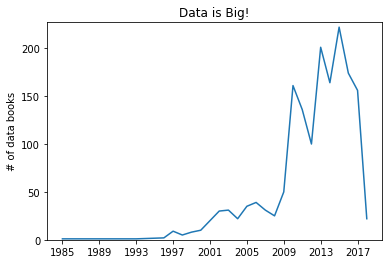

In [6]:
from collections import Counter

def get_year(book):
    """book["release_date"] looks like 'November 2014' so we need to
    split on the space and then take the second piece"""
    if book["release_date"] != 'None':
        return int(book["release_date"].split()[1])
    return -1


year_counts = Counter(get_year(book) for book in books
                      if get_year(book) > 0)

print(year_counts)

import matplotlib.pyplot as plt
import numpy as np

years = sorted(year_counts)
book_counts = [year_counts[year] for year in years]
plt.plot(years, book_counts)
plt.ylabel("# of data books")
plt.title("Data is Big!")
plt.xticks(np.arange(min(years), max(years),4))
plt.ylim([0,max(book_counts)+5])
plt.show()

## Usando APIs

Muitos sites e serviços da Web fornecem interfaces de programação de aplicativos, ou *application programming interfaces* (APIs), que permitem solicitar explicitamente dados em um formato estruturado. Isso evita que você tenha que raspá-los!

### JSON (e XML)

Como o HTTP é um protocolo para transferir texto, os dados solicitados por meio de uma API da Web precisam ser serializados em um formato de string. Muitas vezes, essa serialização usa *JavaScript Object Notation* (JSON). Como mencionado anteriormente, objetos JavaScript parecem bastante semelhantes aos ditames do Python, o que torna suas representações de string fáceis de interpretar.

Novamente, vamos usar o módulo `json` do Python. Dessa vez, usaremos a função `loads`, que desserializa uma string representando um objeto JSON em um objeto Python:

In [2]:
import json

serialized = """{ "title" : "Data Science Book",
"author" : "Joel Grus",
"publicationYear" : 2014,
"topics" : [ "data", "science", "data science"] }"""

# parse the JSON to create a Python dict
deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
    print(deserialized)

{'title': 'Data Science Book', 'author': 'Joel Grus', 'publicationYear': 2014, 'topics': ['data', 'science', 'data science']}


Às vezes, um provedor de API o detesta e fornece apenas respostas em XML:

In [ ]:
<Book>
    <Title>Data Science Book</Title>
    <Author>Joel Grus</Author>
    <PublicationYear>2014</PublicationYear>
    <Topics>
        <Topic>data</Topic>
        <Topic>science</Topic>
        <Topic>data science</Topic>
    </Topics>
</Book>

Você pode usar o `BeautifulSoup` para obter dados do XML de forma semelhante à forma como usamos para obter dados do HTML; verifique sua documentação para detalhes.

## usando uma API não autenticada

Atualmente, a maioria das APIs exige que você primeiro se autentique para usá-las. Apesar de não invejarmos essa política, ela cria muito esforço extra que pode nos confudir. Assim, primeiro veremos a API do GitHub, com a qual você pode fazer algumas coisas simples não autenticadas:

In [6]:
import requests, json
endpoint = "https://api.github.com/users/joelgrus/repos"

repos = json.loads(requests.get(endpoint).text)

print(repos)

[{'id': 112873601, 'node_id': 'MDEwOlJlcG9zaXRvcnkxMTI4NzM2MDE=', 'name': 'advent2017', 'full_name': 'joelgrus/advent2017', 'private': False, 'owner': {'login': 'joelgrus', 'id': 1308313, 'node_id': 'MDQ6VXNlcjEzMDgzMTM=', 'avatar_url': 'https://avatars1.githubusercontent.com/u/1308313?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/joelgrus', 'html_url': 'https://github.com/joelgrus', 'followers_url': 'https://api.github.com/users/joelgrus/followers', 'following_url': 'https://api.github.com/users/joelgrus/following{/other_user}', 'gists_url': 'https://api.github.com/users/joelgrus/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/joelgrus/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/joelgrus/subscriptions', 'organizations_url': 'https://api.github.com/users/joelgrus/orgs', 'repos_url': 'https://api.github.com/users/joelgrus/repos', 'events_url': 'https://api.github.com/users/joelgrus/events{/privacy}', 'received_events_url': '

Neste ponto, `repos` é uma lista de dicionários do Python, cada um representando um repositório público da conta do GitHub do Joel Grus, autor de um dos livros que adotamos neste curso. (Fique à vontade para substituir seu nome de usuário e obter seus dados do repositório do GitHub. Você tem uma conta no GitHub, certo?)

Podemos usar isso para descobrir quais meses e dias da semana Joel Grus tem mais chances de criar um repositório. O único problema é que as datas na resposta são strings (Unicode):

`u'created_at': u'2013-07-05T02:02:28Z'`

Python não vem com um *parser* de datas muito bom, então a gente vai usar um externo. Caso você não tenha instalado o Anaconda, faça:

`pip install python-dateutil`

A partir dessa biblioteca, você vai precisar unicamente da função `dateutil.parser.parse`:

In [11]:
from dateutil.parser import parse
from collections import Counter

dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

print("Exemplo de data:", dates[0])
print("Número de repositórios criados em Julho:", month_counts[0])
print("Número de repositórios criados segunda-feira:", weekday_counts[1])

Exemplo de data: 2017-12-02 20:13:49+00:00
Número de repositórios criados em Julho: 0
Número de repositórios criados segunda-feira: 7


Similarmente, você pode recuperar a linguagem dos últimos cinco repositórios:

In [12]:
last_5_repositories = sorted(repos,
                             key=lambda r: r["created_at"],
                             reverse=True)[:5]

last_5_languages = [repo["language"]
                    for repo in last_5_repositories]

print(last_5_languages)

['HTML', 'Python', 'Python', 'Python', 'Python']


Normalmente, não trabalharemos com APIs nesse nível baixo "faça as solicitações e o parser das respostas". Um dos benefícios do uso do Python é que alguém já criou uma biblioteca para praticamente qualquer API que você tenha interesse em acessar. Quando elas são bem feitas, essas bibliotecas podem poupar muito do trabalho de descobrir os detalhes mais elaborados do acesso à API. (Quando eles não são bem feitos, ou quando eles são baseados em versões antigas das APIs correspondentes, eles podem causar enormes dores de cabeça.)

No entanto, você ocasionalmente terá que criar sua própria biblioteca de acesso à API (ou, mais provavelmente, depurar por que a API de outra pessoa não está funcionando), por isso é bom saber alguns detalhes.

## Encontrando APIs

Se você precisar de dados de um site específico, procure uma seção de desenvolvedores ou API do site para obter detalhes e tente pesquisar na Web por “python __ api” para encontrar uma biblioteca. Existe uma API do Rotten Tomatoes para Python. Existem vários wrappers do Python para a API do Klout, para a API do Yelp, para a API do IMDB e assim por diante.

Se você procura listas de APIs com wrappers do Python, dois diretórios estão em [*Python API*](http://www.pythonapi.com) e em [*Python for Beginners*](http://www.pythonforbeginners.com/development/list-of-python-apis/).

Se você quiser um diretório de APIs da web mais amplo (sem necessariamente wrappers do Python), um bom recurso é [*Programmable Web*](http://www.programmableweb.com), que possui um diretório enorme de APIs categorizadas.

E se depois de tudo, se você não encontrar o que você quer e precisa, sempre há a raspagem, o último refúgio do cientista de dados.

## Exemplo: usando as APIs do Twitter

O Twitter é uma fantástica fonte de dados para trabalhar. Você pode usá-lo para receber notícias em tempo real. Você pode usá-lo para medir reações a eventos atuais. Você pode usá-lo para encontrar links relacionados a tópicos específicos. Você pode usá-lo para praticamente qualquer coisa que possa imaginar, contanto que tenha acesso aos dados. E você pode acessar seus dados por meio de sua API.

Para interagir com as APIs do Twitter, usaremos a biblioteca `Twython` (`pip install twython`). Existem algumas bibliotecas do Twitter do Python por aí, mas essa é uma das mais populares. Você é encorajado a explorar os outras também!

### Obtendo credenciais

Para usar as APIs do Twitter, você precisa obter algumas credenciais (para as quais você precisa de uma conta do Twitter, que você já deve ter, uma vez que todos querem fazer parte da animada e amigável comunidade #datascience do Twitter). Como todas as instruções relacionadas a websites que não controlamos, elas podem ficar obsoletas em algum momento, mas esperamos que funcionem por um tempo. 

1. Vá para https://apps.twitter.com/.
2. Se você não estiver conectado, clique em Conectar e insira seu nome de usuário e senha do Twitter.
3. Clique em *Create New App*.
4. Dê um nome a ele (como "Ciência de dados") e uma descrição, e coloque qualquer URL como o website (não importa qual deles).
5. Concorde com os Termos de Serviço e clique em *Create*.
6. Anote a *consumer key* e o *consumer secret*, que estão na aba *Application Settings*.
7. Clique em "create my access token".
8. Anote o "*Access Token*" e o "*Access Token Secret*" (talvez seja necessário atualizar a página).

A chave do consumidor e o segredo do consumidor dizem ao Twitter qual aplicativo está acessando suas APIs, enquanto o token de acesso e o segredo do token de acesso informam ao Twitter quem está acessando suas APIs. Se você já usou sua conta do Twitter para fazer login em algum outro site, a página "clique para autorizar" gerava um token de acesso para esse site para convencer o Twitter de que era você (ou, pelo menos, agir em seu nome) ). Como não precisamos dessa funcionalidade "permitir que alguém faça login", podemos obter o token de acesso gerado estaticamente e acessar o segredo do token.

**Importante:** A chave / segredo do consumidor e a chave / segredo do token de acesso devem ser tratados como senhas. Você não deve compartilhá-los, não deve publicá-los em seu livro e não deve registrá-los em seu repositório público do GitHub. Uma solução simples é armazená-los em um arquivo `twitter_credentials.json` que não é compartilhado a partir de `json.dump` e, depois, usar `json.load` para recuperá-los:

In [ ]:
twitter_keys = dict()

twitter_keys['CONSUMER_KEY'] = "seu_codigo_aqui"
twitter_keys['CONSUMER_SECRET'] = "seu_codigo_aqui"
twitter_keys['ACCESS_TOKEN'] = "seu_codigo_aqui"
twitter_keys['ACCESS_TOKEN_SECRET'] = "seu_codigo_aqui"

with open('./private/twitter_credentials.json', 'w') as fout:
    json.dump(twitter_keys, fout)

Depois de criar o arquivo `twitter_credentials.json`, apague os seus códigos da célula acima e use `json.load` para recuperar os dados que salvou:

In [18]:
del twitter_keys

with open('./private/twitter_credentials.json') as json_file:  
    twitter_keys = json.load(json_file)


### Usando Twython

Primeiro, veremos a API de pesquisa, que exige apenas a chave do consumidor e o segredo, não o token de acesso ou o segredo:

In [20]:
from twython import Twython

twitter = Twython(twitter_keys['CONSUMER_KEY'], twitter_keys['CONSUMER_SECRET'])

# search for tweets containing the phrase "data science"
for status in twitter.search(q='"data science"')["statuses"]:
    user = status["user"]["screen_name"].encode('utf-8')
    text = status["text"].encode('utf-8')
    print(user, ":", text)
    print()

b'machinelearn_d' : b'RT @gemini_finance: How to Build a #DataScience Team: https://t.co/NgUX6PvH8D\nGreat article by @Ronald_vanLoon\n#DataScientist #cloud #bigDa\xe2\x80\xa6'

b'DavidSweenor' : b'RT @shawnrog: #AI researchers allege that machine learning is alchemy. MyPOV: Trial and error &amp; experimentation indicate why \xe2\x80\x9cblack box\xe2\x80\x9d da\xe2\x80\xa6'

b'armaninspace' : b"Next Chapter For Biotech? Many Say 'Convergence' With Data Science #DataScience #BigData https://t.co/FIaALouAD2"

b'BrandonLive' : b'@NorrathReaver @emannxx @h0x0d @WithinRafael That isn\xe2\x80\x99t true at all, and is completely off topic here. We\xe2\x80\x99re doing\xe2\x80\xa6 https://t.co/AJKnNG9Fkl'

b'deepthoughtdasc' : b'RT @KirkDBorne: The Data Science Bubble \xe2\x80\x94 Why #DataScience Needs #Entrepreneurship: https://t.co/tpZWCVtDFc #BigData #DataScientists #Innov\xe2\x80\xa6'

b'Mx3Metrics' : b'RT @TechTarget: .@TechTarget launches new website to help enterprise data science and a

Os tweets acima representam um começo, mas não são muito interessantes, pois a API de pesquisa do Twitter mostra apenas alguns resultados recentes. Quando você está fazendo ciência de dados, mais vezes você quer muitos tweets. É aqui que a [*Streaming API*](https://developer.twitter.com/en/docs/tutorials/consuming-streaming-data) é útil. Ele permite que você se conecte a uma amostra do grande Twitter. Para usá-lo, você precisará autenticar usando seus tokens de acesso.

Para acessar a API de streaming com Twython, precisamos definir uma classe que herda de TwythonStreamer e que substitui seu método `on_success` (e possivelmente seu método `on_error`):

In [30]:
from twython import TwythonStreamer

# appending data to a global variable is pretty poor form
# but it makes the example much simpler
tweets = []

class MyStreamer(TwythonStreamer):
    """our own subclass of TwythonStreamer that specifies
    how to interact with the stream"""

    def on_success(self, data):
        """what do we do when twitter sends us data?
        here data will be a Python object representing a tweet"""

        # only want to collect English-language tweets
        if data['lang'] == 'en':
            tweets.append(data)

        # stop when we've collected enough
        if len(tweets) >= 1000:
            self.disconnect()

    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()

O MyStreamer se conectará ao fluxo de dados (*stream*) do Twitter e aguardará o Twitter para alimentá-lo com mais dados. Cada vez que recebe alguns dados (aqui, um Tweet representado como um objeto Python), ele o passa para o método `on_success`, que o acrescenta à nossa lista de tweets se o idioma do mesmo for o inglês, e desconecta o streamer depois de coletar 1.000 tweets.

Tudo o que resta é inicializá-lo e iniciá-lo:

In [31]:
stream = MyStreamer(twitter_keys['CONSUMER_KEY'], twitter_keys['CONSUMER_SECRET'],
                        twitter_keys['ACCESS_TOKEN'], twitter_keys['ACCESS_TOKEN_SECRET'])

# starts consuming public statuses that contain the keyword 'brazil'
stream.statuses.filter(track='brazil')

# if instead we wanted to start consuming a sample of *all* public statuses
# stream.statuses.sample()

Isso será executado até que ele colete 1.000 tweets (ou até encontrar um erro) e pare, quando você poderá começar a analisar esses tweets. Por exemplo, você pode encontrar as hashtags mais comuns com:

In [33]:
top_hashtags = Counter(hashtag['text'].lower()
                       for tweet in tweets
                       for hashtag in tweet["entities"]["hashtags"])

print(top_hashtags.most_common(5))

[('worldcup', 252), ('choicefandom', 37), ('btsarmy', 37), ('brazil', 17), ('choiceinternationalartist', 14)]


In [36]:
for i in range(0,10):
    print(tweets[i]["text"], "\n")
    


RT @FlamengoENG: VAR already implemented in pick-up games in Brazil 😅 https://t.co/dcUAWRE4ty 

Mr. Carlo Pereira, Executive Secretary of the @globalcompact in Brazil opens event transdocumenta 2018 @redbull sta… https://t.co/P5foMVK7CR 

@FunnyGooner Hahahahah definitely and England Fan who shat his pants along with the other England goods upon hearin… https://t.co/KkRQMgoXfD 

RT @PurelyFootball: 🏴󠁧󠁢󠁥󠁮󠁧󠁿 Teams England now avoid until the #WorldCup⁠ ⁠final:

🇺🇾 Uruguay
🇵🇹 Portugal
🇫🇷 France
🇦🇷 Argentina
🇧🇷 Brazil… 

RT @chrislhayes: So wonderful that Brazil welcomed them in with open arms and didn't slander them as criminals, rapists, imposters and verm… 

RT @WCGoalz: Retweet if your country are still in the #WorldCup

🇷🇺 Russia
🇺🇾 Uruguay
🇪🇸 Spain
🇵🇹 Portugal
🇫🇷 France
🇩🇰 Denmark
🇭🇷 Croatia… 

RT @yoonsymphony: All the countries in airplane pt2 that were in the first round of WC made it to the second round 

London - England
Paris… 

Qualified for World Cup knockout stage:

- Urugua

Cada tweet contém muitos dados. Você pode tentar adivinhar quais são os campos de cada tweet ou pesquisar na [documentação da API do Twitter](https://dev.twitter.com/overview/api/tweets).

Em um projeto que não é de brinquedo, você provavelmente não gostaria de confiar em uma lista na memória para armazenar os tweets. Em vez disso, você pode salvá-los em um arquivo ou banco de dados, para que você os tenha permanentemente. Aqui, vamos salvar os tweets que coletamos em um arquivo `.json`:

In [37]:
with open('./data/twitter_sample_brazil.json', 'w') as fout:
    json.dump(tweets, fout)

In [7]:
with open('./data/twitter_sample_brazil.json') as json_file:  
    tweets = json.load(json_file)
for i in range(0,10):
    print(tweets[i]["text"], "\n")    

## Para Explorar

* [pandas](http://pandas.pydata.org/) é a biblioteca primária que os cientistas de dados usam para trabalhar com (e, em particular, importar) dados.

* O [Scrapy](http://scrapy.org/) é uma biblioteca com mais recursos para a criação de scrapers da Web mais complexos que fazem coisas como seguir links desconhecidos.